In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import sys, importlib
sys.path.append('../kode/readout_system/')

import components as comp
importlib.reload(comp)


<module 'components' from '/mnt/c/Users/johan/OneDrive/Skrivebord/Master_Thesis/SC_PUK/../kode/readout_system/components.py'>

In [52]:
n_cutoff = 8

qubit_A = comp.Fluxonium(
    EJ = 4.0,
    EC = 1.0,
    EL = 0.9,
    n_cutoff = n_cutoff,
)

qubit_B = comp.Fluxonium(
    EJ = 4.0,
    EC = 1.0,
    EL = 1.0,
    n_cutoff = n_cutoff,
)   

JL, JC = 2e-3, 11.5e-3 


In [68]:
comp_states = 2

Es_A, vects_A = qubit_A.eigen_basis(comp_states)
Es_B, vects_B = qubit_B.eigen_basis(comp_states)

vects = np.array([np.kron(vects_A[:, i], vects_B[:, j]) for i in range(comp_states) for j in range(comp_states)])

H_A = np.diag(Es_A)
H_B = np.diag(Es_B)

I_A, I_B = np.eye(comp_states), np.eye(comp_states)

H_0 = np.kron(H_A, I_B) + np.kron(I_A, H_B)

In [91]:
JCs = np.linspace(0, 2 * np.pi * 80e-3, 100)
JL  = 20e-3
chi_ZZ = []

for JC in JCs:
    I_A_charge, I_B_charge = np.eye(2 * n_cutoff + 1), np.eye(2 * n_cutoff + 1)

    coupling_C = + JC * np.kron(qubit_A.n_matrix().todense(), I_B_charge) @ np.kron(I_A_charge, qubit_B.n_matrix().todense())
    coupling_L = - JL * np.kron(qubit_A.phi_matrix().todense(), I_B_charge) @ np.kron(I_A_charge, qubit_B.phi_matrix().todense())

    H_int = coupling_C + coupling_L

    H_int_comp_space = np.kron(vects_A, vects_B).T @ H_int @ np.kron(vects_A, vects_B)

    eigvals, eigvecs = np.linalg.eig(H_0 + H_int_comp_space)

    chi_ZZ.append(eigvals[0] + eigvals[-1] - eigvals[1] - eigvals[-2])


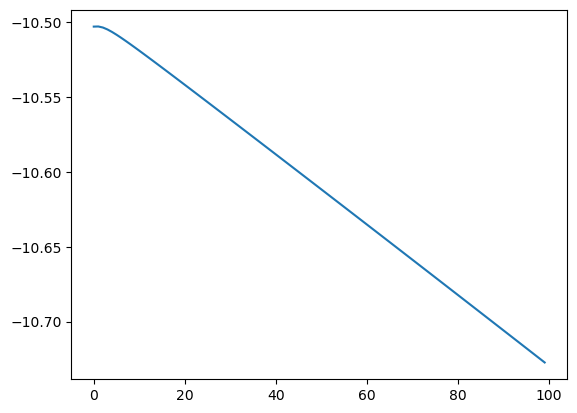

In [92]:
plt.plot(chi_ZZ)

In [71]:
H = H_0 + H_int_comp_space


In [77]:
np.diag(H)

array([-2.99397937,  2.25746632,  2.25093445,  7.50238015])

In [76]:
np.linalg.eigh(H)

(array([-2.99397999,  2.25005218,  2.25834859,  7.50238077]),
 matrix([[-9.99999970e-01, -4.23737502e-19, -7.25644785e-18,
           2.43664553e-04],
         [-6.76960390e-18, -3.26103607e-01,  9.45334035e-01,
          -2.22044190e-16],
         [ 2.75276471e-18, -9.45334035e-01, -3.26103607e-01,
          -5.81236470e-17],
         [-2.43664553e-04,  1.20909339e-16, -1.23466613e-16,
          -9.99999970e-01]]))

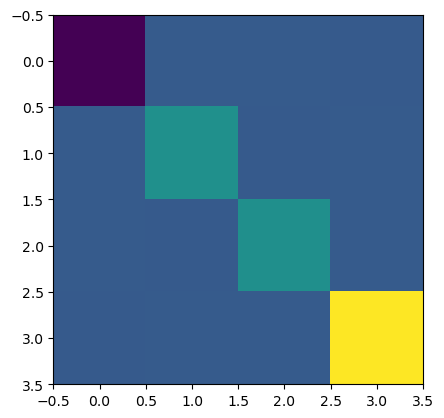

In [74]:
plt.imshow(H)

In [75]:
H

matrix([[-2.99397937e+00, -3.59955121e-17,  1.43637826e-17,
         -2.55759098e-03],
        [-3.59955121e-17,  2.25746632e+00, -2.55759098e-03,
         -9.60473099e-17],
        [ 1.43611993e-17, -2.55759098e-03,  2.25093445e+00,
          3.45209972e-16],
        [-2.55759098e-03, -9.60209046e-17,  3.45643653e-16,
          7.50238015e+00]])